##Import Library

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

df = pd.read_csv(r'C:\\Users\\putra\\Downloads\\fileuplaod\\testerUpload\\heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Data Understanding

In [16]:
print("ukuran : ", df.shape)

ukuran :  (1025, 14)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
summary = {}

for col in df.columns:
    summary[col] = {
        'Unique Values': df[col].nunique(),
        'Most Frequent': df[col].mode()[0] if not df[col].mode().empty else None,
        'Most Frequent Count': df[col].value_counts(dropna=False).iloc[0] if not df[col].value_counts(dropna=False).empty else None,
        'Data Type': df[col].dtype
    }

summary_df = pd.DataFrame(summary).T.sort_index()
summary_df

,Unique Values,Most Frequent,Most Frequent Count,Data Type
age,41,58,68,int64
ca,5,0,578,int64
chol,152,204,21,int64
cp,4,0,497,int64
exang,2,0,680,int64
fbs,2,0,872,int64
oldpeak,40,0.0,329,float64
restecg,3,1,513,int64
sex,2,1,713,int64
slope,3,1,482,int64


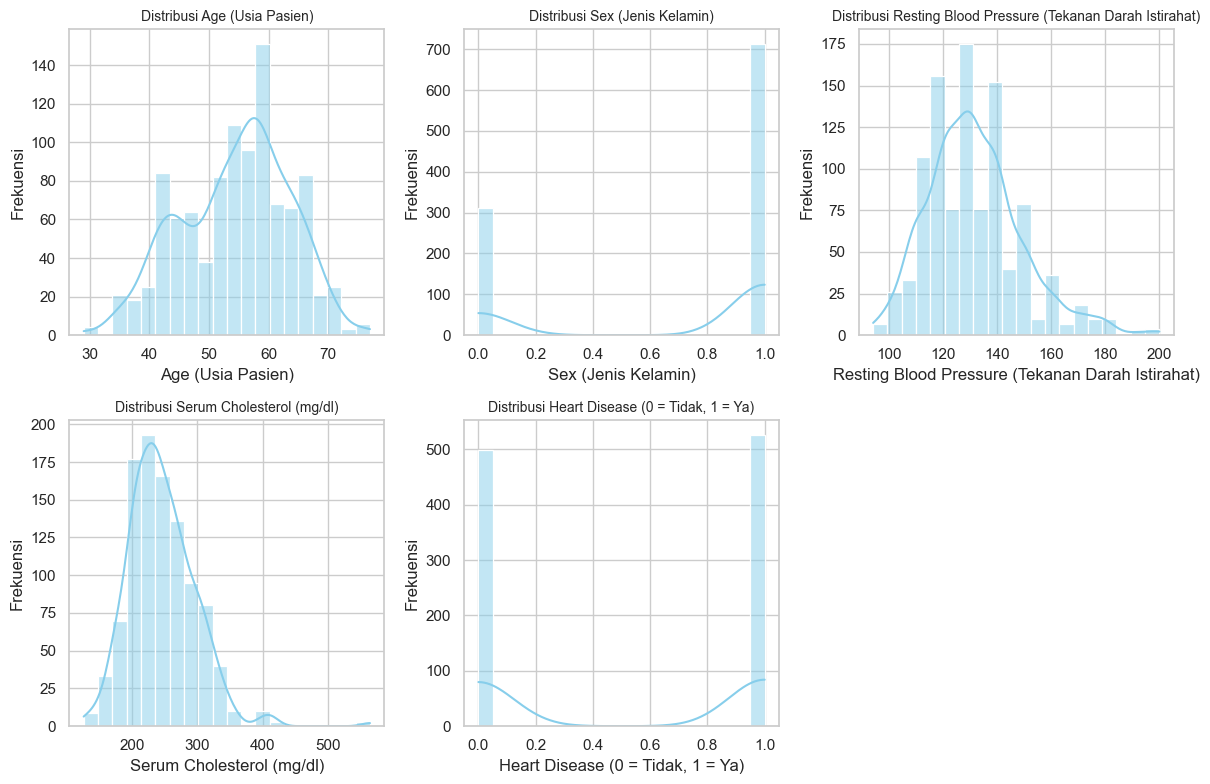

In [20]:
cols = {
    'age': 'Age (Usia Pasien)',
    'sex': 'Sex (Jenis Kelamin)',
    'trestbps': 'Resting Blood Pressure (Tekanan Darah Istirahat)',
    'chol': 'Serum Cholesterol (mg/dl)',
    'target': 'Heart Disease (0 = Tidak, 1 = Ya)'
}

sns.set(style="whitegrid", palette="muted", color_codes=True)

plt.figure(figsize=(12, 8))

for i, (col, title) in enumerate(cols.items(), 1):
    plt.subplot(2, 3, i)
    if df[col].dtype == 'object':
        sns.countplot(x=df[col], hue=df[col], legend=False)
    else:
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi {title}', fontsize=10)
    plt.xlabel(title)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


#DATA CLEANING

In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(723)

In [23]:
df = df.drop(columns=['id', 'dataset'], errors='ignore')

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


C:\Users\putra\AppData\Local\Temp\ipykernel_21348\3763454293.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\putra\AppData\Local\Temp\ipykernel_21348\3763454293.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#EDA (EXPLORATORY DATA ANALYSIS)

In [25]:
sns.set_theme(style="whitegrid", palette="Set2")

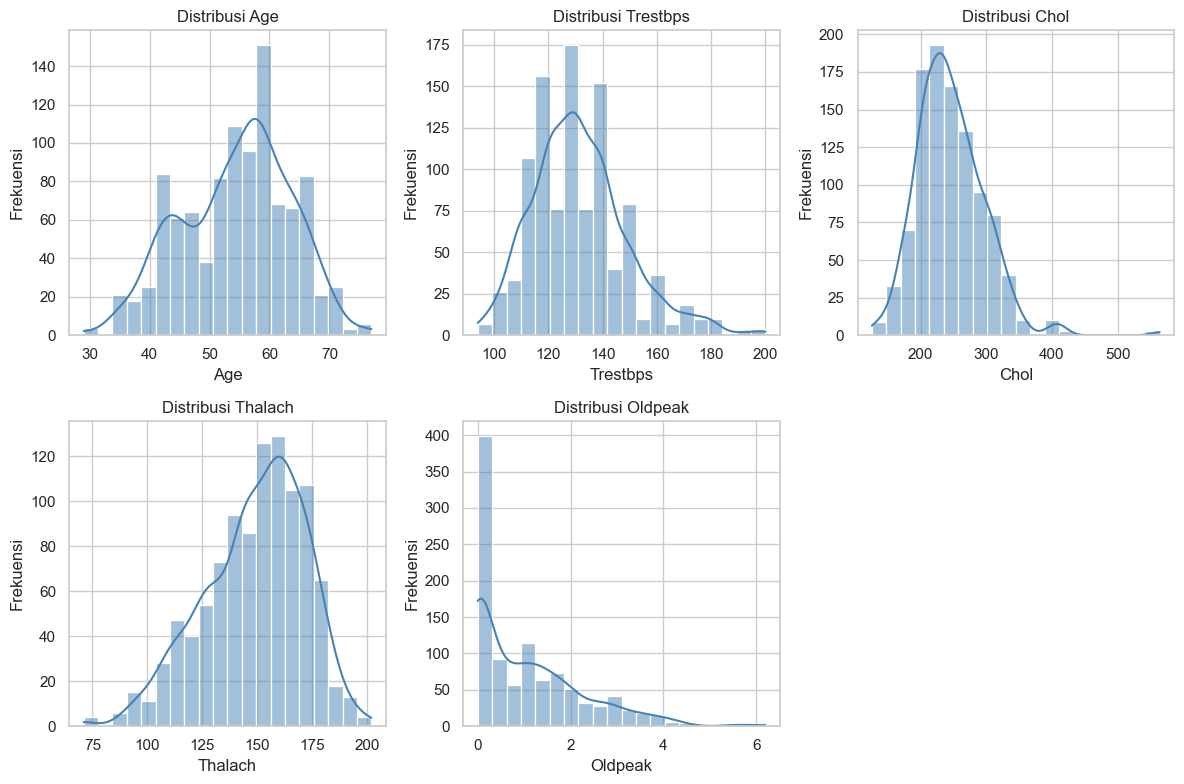

In [26]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribusi {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

C:\Users\putra\AppData\Local\Temp\ipykernel_21348\2224239534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='flare')
C:\Users\putra\AppData\Local\Temp\ipykernel_21348\2224239534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='flare')
C:\Users\putra\AppData\Local\Temp\ipykernel_21348\2224239534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='flare')
C:\Users\putra\AppData\Local\Temp\ipykernel_21348\2224239534.py:6: FutureWarning: 

Passing `palette` w

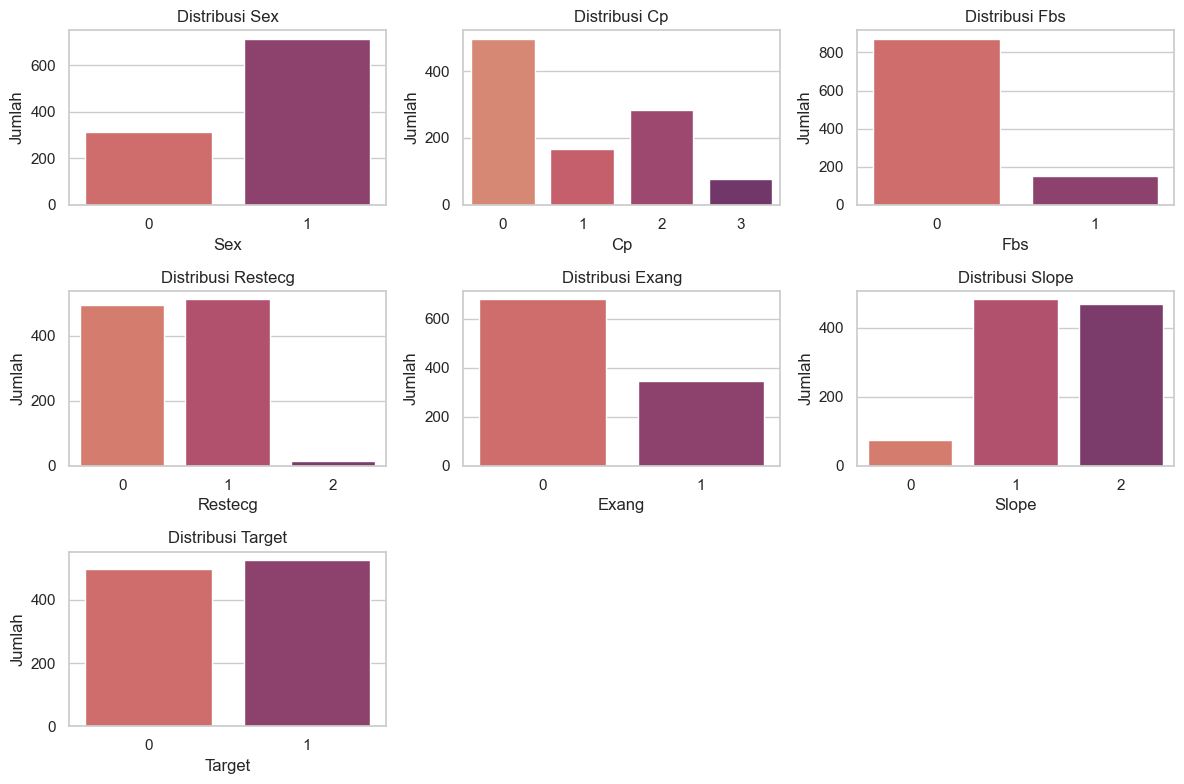

In [27]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, palette='flare')
    plt.title(f'Distribusi {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

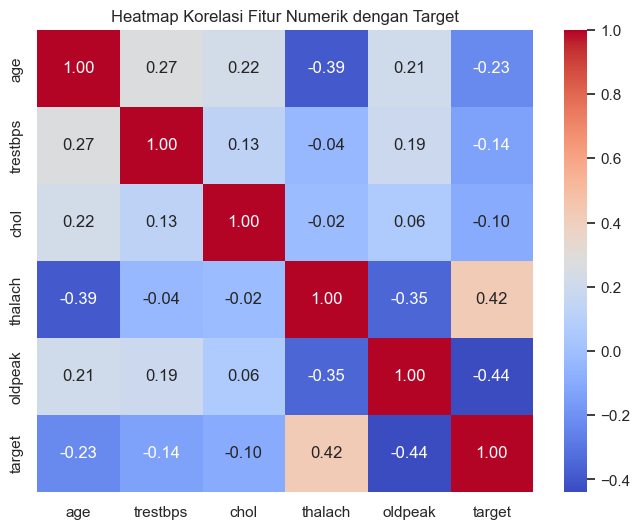

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols + ['target']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik dengan Target")
plt.show()

#Preparation Data

In [29]:
drop_cols = ['id', 'dataset']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])
print("Kolom setelah penghapusan kolom tidak relevan:")
print(df.columns.tolist())

Kolom setelah penghapusan kolom tidak relevan:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [30]:
for col in cat_cols:
    unique_vals = df[col].unique()
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    df[col] = df[col].map(mapping)
    print("hasil encoding kategorikal (5 baris pertama):")
    print(df[cat_cols].head())

hasil encoding kategorikal (5 baris pertama):
   sex  cp  fbs  restecg  exang  slope  target
0    0   0    0        1      0      2       0
1    0   0    1        0      1      0       0
2    0   0    0        1      1      0       0
3    0   0    0        1      0      2       0
4    1   0    1        1      0      1       0
hasil encoding kategorikal (5 baris pertama):
   sex  cp  fbs  restecg  exang  slope  target
0    0   0    0        1      0      2       0
1    0   0    1        0      1      0       0
2    0   0    0        1      1      0       0
3    0   0    0        1      0      2       0
4    1   0    1        1      0      1       0
hasil encoding kategorikal (5 baris pertama):
   sex  cp  fbs  restecg  exang  slope  target
0    0   0    0        1      0      2       0
1    0   0    1        0      1      0       0
2    0   0    0        1      1      0       0
3    0   0    0        1      0      2       0
4    1   0    1        1      0      1       0
hasil encoding k

In [31]:
X = df[['sex', 'cp', 'thalach', 'exang',
        'oldpeak', 'slope', 'ca', 'thal']].values
y = df['target'].values


In [32]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

In [33]:
np.random.seed(42)
indices = np.arange(len(X_scaled))
np.random.shuffle(indices)

split = int(0.8 * len(X_scaled))
train_idx, test_idx = indices[:split], indices[split:]

x_train, x_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("Data training:", x_train.shape)
print("Data testing :", x_test.shape)

Data training: (820, 8)
Data testing : (205, 8)


#MODELING DATA (KNN)

In [34]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def predict_one(x, X_train, y_train, k=5):
    distances = np.sqrt(((X_train - x)**2).sum(axis=1))
    k_indices = distances.argsort()[:k]
    k_nearest_labels = y_train[k_indices]
    counts = np.bincount(k_nearest_labels)
    return counts.argmax()

def predict(X_test, X_train, y_train, k=5):
    y_pred = [predict_one(x, X_train, y_train, k) for x in X_test]
    return np.array(y_pred)

y_pred_manual = predict(x_test, x_train, y_train, k=5)

accuracy = np.mean(y_pred_manual == y_test)
print("Akurasi KNN Manual:", accuracy)


Akurasi KNN Manual: 0.8536585365853658


#MODELING DATA (NAIVE BAYES)

In [35]:
def fit_gaussian_nb(X, y):
    """
    X : array (n_samples, n_features)
    y : array (n_samples,)
    """
    classes = np.unique(y)
    params = {}

    for c in classes:
        X_c = X[y == c]
        prior = X_c.shape[0] / X.shape[0]          # P(class)
        mean = X_c.mean(axis=0)                    # mean per fitur
        var = X_c.var(axis=0) + 1e-9               # var per fitur + epsilon agar nilai tidak 0

        params[c] = {
            "prior": prior,
            "mean": mean,
            "var": var
        }

    return params


def predict_gaussian_nb(X, params):
    """
    X      : data yang mau diprediksi (x_test, new_patient_scaled, dst.)
    params : output dari fit_gaussian_nb
    """
    classes = list(params.keys())
    n_samples = X.shape[0]
    log_posteriors = np.zeros((n_samples, len(classes)))

    for idx, c in enumerate(classes):
        prior = params[c]["prior"]
        mean = params[c]["mean"]
        var = params[c]["var"]

        # log-likelihood Gaussian per sample
        # rumus: -0.5*sum(log(2πσ²)) - 0.5*sum((x-μ)²/σ²)
        log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var))
        log_likelihood -= 0.5 * np.sum(((X - mean) ** 2) / var, axis=1)

        log_posteriors[:, idx] = np.log(prior) + log_likelihood

    class_indices = np.argmax(log_posteriors, axis=1)
    return np.array([classes[i] for i in class_indices])

gnb_params = fit_gaussian_nb(x_train, y_train)


## Akurasi

In [36]:
def confusion_matrix_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def precision_manual(TP, FP):
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall_manual(TP, FN):
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def f1_score_manual(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [37]:
results = []

for k in range(3, 10):
    y_pred_k = predict(x_test, x_train, y_train, k=k)
    accuracy = np.mean(y_pred_k == y_test)

    TP, TN, FP, FN = confusion_matrix_manual(y_test, y_pred_k)
    precision = precision_manual(TP, FP)
    recall = recall_manual(TP, FN)
    f1 = f1_score_manual(precision, recall)

    results.append({
        'Nilai K': k,
        'Akurasi': round(accuracy, 2),
        'Presisi': round(precision, 2),
        'Recall': round(recall, 2),
        'F1-score': round(f1, 2)
    })


In [38]:
df_results = pd.DataFrame(results)
print(df_results)

   Nilai K  Akurasi  Presisi  Recall  F1-score
0        3     0.93     0.98    0.88      0.93
1        4     0.89     1.00    0.78      0.88
2        5     0.85     0.90    0.81      0.85
3        6     0.85     0.91    0.79      0.85
4        7     0.85     0.86    0.85      0.85
5        8     0.84     0.88    0.80      0.84
6        9     0.86     0.87    0.85      0.86


## K-Fold Cross Validation

In [39]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn_scores = []
fold = 1

print("\n=== KNN Manual (5-Fold Cross Validation) ===")

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_pred = predict(X_test, X_train, y_train, k=8)
    acc = np.mean(y_pred == y_test)
    knn_scores.append(acc)

    print(f"Fold {fold} - Akurasi: {acc:.4f}")
    fold += 1

print("Rata-rata Akurasi KNN:", np.mean(knn_scores))



=== KNN Manual (5-Fold Cross Validation) ===
Fold 1 - Akurasi: 0.8439
Fold 2 - Akurasi: 0.8537
Fold 3 - Akurasi: 0.8537
Fold 4 - Akurasi: 0.8732
Fold 5 - Akurasi: 0.8390
Rata-rata Akurasi KNN: 0.8526829268292684


In [40]:
gnb_scores = []
fold = 1

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    params = fit_gaussian_nb(X_train, y_train)
    y_pred = predict_gaussian_nb(X_test, params)

    acc = np.mean(y_pred == y_test)
    gnb_scores.append(acc)

    print(f"Fold {fold} - Akurasi: {acc:.4f}")
    fold += 1

print("Rata-rata Akurasi GNB:", np.mean(gnb_scores))


Fold 1 - Akurasi: 0.8049
Fold 2 - Akurasi: 0.8537
Fold 3 - Akurasi: 0.8049
Fold 4 - Akurasi: 0.8683
Fold 5 - Akurasi: 0.8000
Rata-rata Akurasi GNB: 0.8263414634146342


## Prediksi


In [41]:
new_patient = np.array([[54, 1, 2, 130, 250, 160, 0, 1.2]])

new_patient_scaled = (new_patient - X_mean) / X_std

# Prediksi dengan KNN
pred_new_knn = predict(new_patient_scaled, x_train, y_train, k=8)

# Prediksi dengan Gaussian Naive Bayes
pred_new_gnb = predict_gaussian_nb(new_patient_scaled, gnb_params)

print("Hasil Prediksi Pasien Baru (KNN)  =", pred_new_knn)
print("Hasil Prediksi Pasien Baru (GNB)  =", pred_new_gnb)

if pred_new_knn[0] == 1:
    print("(KNN) Pasien berisiko terkena penyakit jantung.")
else:
    print("(KNN) Pasien tidak berisiko penyakit jantung.")

if pred_new_gnb[0] == 1:
    print("(GNB) Pasien berisiko terkena penyakit jantung.")
else:
    print("(GNB) Pasien tidak berisiko penyakit jantung.")

Hasil Prediksi Pasien Baru (KNN)  = [1]
Hasil Prediksi Pasien Baru (GNB)  = [0]
(KNN) Pasien berisiko terkena penyakit jantung.
(GNB) Pasien tidak berisiko penyakit jantung.


##Simpan Model

In [42]:
knn_manual_model = {
    'X_train': x_train,
    'y_train': y_train,
    'k': 8,
    'mean': X_mean,
    'std': X_std
}

with open('knn_model_nih.pkl', 'wb') as file:
    pickle.dump(knn_manual_model, file)

print("✅ Model KNN manual berhasil disimpan")


✅ Model KNN manual berhasil disimpan


In [43]:
gnb_manual_model = {
    'params': gnb_params,
    'mean': X_mean,
    'std': X_std
}

with open('gnb_model_nih.pkl', 'wb') as file:
    pickle.dump(gnb_manual_model, file)

print("✅ Model Gaussian NB manual berhasil disimpan")


✅ Model Gaussian NB manual berhasil disimpan


In [ ]:
class knn_model()